# New York vs Toronto - Battle Of Neighbourhoods

## Introduction - defining of business problem

This work is a capstone project submission for "IBM Data Science Professional Certificate" online course on Coursera. Additionally it can showcase my knowledge and skills in data science/data analysis of real-world datasets and different scenarios.


In the notbook I will try to compare the cities of Toronto (Canada) and New York (USA). I will find some public datasets, explore them, anylize them and visualise them. All this work will be later visualised and presented in the form of presentation document.

Both final deliverable and this notebook can be usefull for many various stakeholders, including for example:
1) Students considering taking studies in any of city in question. <br/>
2) Somebody who got an job offer in either NY or Toronto and would like to get to know the city before making decision to move.<br/>
3) Business management - exploration of the city could help in making decision in which district would be best to open a business (like bank, coffee shop, restaturant etc).<br/>
4) Citizens of various countries could find the area of the city that suits them best before they decide to move.<br/>
5) Turists will find it easier to make decision what to visit in the city or which city for a visit to choose.

Both cities offer a lot of similiarities but they are in many aspects quite different. <br/>In this work I will first extract data of New York and Toronto neighboorhoods, process and explore them, and find some similaraties and differences between neighbourhoods in these two cities. 

Intention is to utilize most of data science skills learned during work on the IBM Data Science Professional Certifficate course.

# New York
Source: https://www.history.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTU3ODc5MDgyNjY5OTc1MjYz/new-york-city.jpg


<img src="https://www.history.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTU3ODc5MDgyNjY5OTc1MjYz/new-york-city.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" 
     width="600"
     height="400"/>

# Toronto
Source: https://media.tacdn.com/media/attractions-splice-spp-674x446/06/70/3d/1f.jpg


<img src="https://media.tacdn.com/media/attractions-splice-spp-674x446/06/70/3d/1f.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" 
     width="600"
     height="400"/>

In [1]:
#importing modules
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#importing modules
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
#!conda install -c conda-forge folium=0.5.0
import folium

print('Libraries imported. Choice of libraries based on previous course modules')

Libraries imported. Choice of libraries based on previous course modules


## Description of data used
For New York data in the form of json file will be used.It will be download from a link given during one of the course labs. Data will be presented as pandas the dataframe. <br/>

For Toronto data will be scraped from Wikipedia with Web Scraping using BeautifulSoup libraries. This scrapped data will be later joined with geospatial coordinates of Toronto (obtained in one of the labs of the course) .

In [2]:
#!python -m wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json -o '/Users/MacbookTT/Downloads/newyork_data.json' 

In [3]:
#File with NY date has been extracted and written on my local computer for later processing.

In [4]:
#Processing of NY data and creating Dataframe

with open('/Users/MacbookTT/Downloads/newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

neighborhoods_data = newyork_data['features']
neighborhoods_data[0]
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods_ny = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods_ny = neighborhoods_ny.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

print('DataFrame created!')

DataFrame created!


In [5]:
neighborhoods_ny.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [6]:
#Reviewing data of New York

In [7]:
neighborhoods_ny.shape

(306, 4)

In [8]:
neighborhoods_ny.describe(include="all")

,Borough,Neighborhood,Latitude,Longitude
count,306,306,306.000000,306.000000
unique,5,302,NaN,NaN
top,Queens,Chelsea,NaN,NaN
freq,81,2,NaN,NaN
mean,NaN,NaN,40.701362,-73.946254
std,NaN,NaN,0.097498,0.121202
min,NaN,NaN,40.505334,-74.246569
25%,NaN,NaN,40.617778,-74.000062
50%,NaN,NaN,40.702969,-73.932009
75%,NaN,NaN,40.766645,-73.857525


In [9]:
# Extracting data for Toronto

extracting beautifull soup - code follows also instructions from coursera assignment i.e. <br/>if Neighborhood is Not assigned make Neighborhood' equal to Borough

In [10]:
url_toronto="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(url_toronto).text
soup = BeautifulSoup(source, 'html.parser')

In [11]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        if cell['Neighborhood']=='Not assigned' :
            cell['Neighborhood']=cell['Borough']
        table_contents.append(cell)
        

In [12]:
df=pd.DataFrame(table_contents) #creating pandas dataframe of Toronto

In [13]:
df.head() #Toronto dataframe review

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [14]:
df.shape

(103, 3)

In [15]:
df.describe(include="all")

,PostalCode,Borough,Neighborhood
count,103,103,103
unique,103,15,103
top,M6S,North York,Enclave of M5E
freq,1,24,1


In [16]:
print('There were found {} neighborhoods and boroughs in New York and {} neighborhoods and boroughs in Toronto.'.format(
        neighborhoods_ny.shape[0], df.shape[0]
    )
)

There were found 306 neighborhoods and boroughs in New York and 103 neighborhoods and boroughs in Toronto.


#### Data simplification

In order to make visualisations and maps visible there will be performed simplification af data. <br/>
For illustration purposes and readibility of the project New York database will be sliced to Manhattan data and Toronto database will be sliced to neighbourhood containing word Toronto. Similiar task as during the course.  

In [24]:
#Cell left or possible dubugging. this and next 2 cells are probably not required
#I will refer to boroughs containing name "Toronto" as sugested in the LABs for simlification

In [25]:
toronto = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto.shape

(39, 3)

In [26]:
#toronto.head()

In [27]:
#Toronto dataframe does not include coordinates
#Therefore I will merge the dataframe with coordinates of Toronto extracted in on of the labs

In [28]:
#Using read CSV method - getting Toronto coordinates 
geo_coordinates="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv"
df_toronto_coord = pd.read_csv(geo_coordinates)
df_toronto_coord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [29]:
#making same column name in both tables before merging on column name "PostalCode"
df_toronto_coord2 = df_toronto_coord.rename(columns={"Postal Code" : "PostalCode"})
df_toronto_coord2.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [120]:
toronto_merged_all = pd.merge(df, df_toronto_coord2, on="PostalCode")
toronto_merged_all.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [32]:
toronto_merged_all.shape

(103, 5)

In [33]:
#Data with borough containing string "Toronto" for simplification
toronto_merged = toronto_merged_all[toronto_merged_all['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_merged.shape 

(39, 5)

In [34]:
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [35]:
#Simplifing data of Manhattan - data contains coordinates already i.e. no need to any mergeing of dataframes

In [36]:
manhattan_data = neighborhoods_ny[neighborhoods_ny['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.shape

(40, 4)

In [37]:
print('Now database is reduced to {} neighborhoods and boroughs in New York and {} neighborhoods and boroughs in Toronto.'.format(
        manhattan_data.shape[0], toronto_merged.shape[0]
    )
)

Now database is reduced to 40 neighborhoods and boroughs in New York and 39 neighborhoods and boroughs in Toronto.


## Visualising on the maps

In [123]:
#using geocode to get coordinates of Toronto (similiar as in LAB):
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of {} are Latitude{}, Longitude {}.'.format(address, latitude, longitude))

Coordinates of Toronto, Canada are Latitude43.6534817, Longitude -79.3839347.


In [127]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [40]:
#Similiar task repeated for New York

In [41]:
#using geocode to get coordinates of New York (similiar as in LAB):
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="Toronto_explorer")
# original # geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [42]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

## Data exploration and analysis

Foursquare API will be used to get the nearby venues for both cities. Thereafter one-hot encoding and  k-means clustering algorithm will be utilised to analyze the Neighbourhood.

In [43]:
#My Forsquare credentials
CLIENT_ID = 'IK1BTQPB2XZBC2YN0NWSCHRMAG3PBIEVPGS0ZRJ5JUXILS2I' # your Foursquare ID
CLIENT_SECRET = '50GTUXMX1ELZ3TDGCCL2CARDAAGFONZAEWGYLSICMOVP4NLB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IK1BTQPB2XZBC2YN0NWSCHRMAG3PBIEVPGS0ZRJ5JUXILS2I
CLIENT_SECRET:50GTUXMX1ELZ3TDGCCL2CARDAAGFONZAEWGYLSICMOVP4NLB


In [44]:
#Similiar function to getNearbyVenues was used in the labs:

In [45]:
#Getting venues of New York

In [46]:
LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [48]:
manhattan_venues.shape

(3239, 7)

In [132]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym


In [50]:
mht_bar1=manhattan_venues["Venue Category"].value_counts()
mht_bar1.head(10) #data for barcharts visualisation performed later in the notebook

Coffee Shop            144
Italian Restaurant     133
Café                    77
Bakery                  77
Pizza Place             77
American Restaurant     77
Park                    73
Hotel                   69
Bar                     66
Mexican Restaurant      58
Name: Venue Category, dtype: int64

In [51]:
dfmht=pd.DataFrame(mht_bar1)
dfmht.head(15)

,Venue Category
Coffee Shop,144
Italian Restaurant,133
Café,77
Bakery,77
Pizza Place,77
American Restaurant,77
Park,73
Hotel,69
Bar,66
Mexican Restaurant,58


In [52]:
#Visualising Manhattan
import matplotlib.pyplot as plt

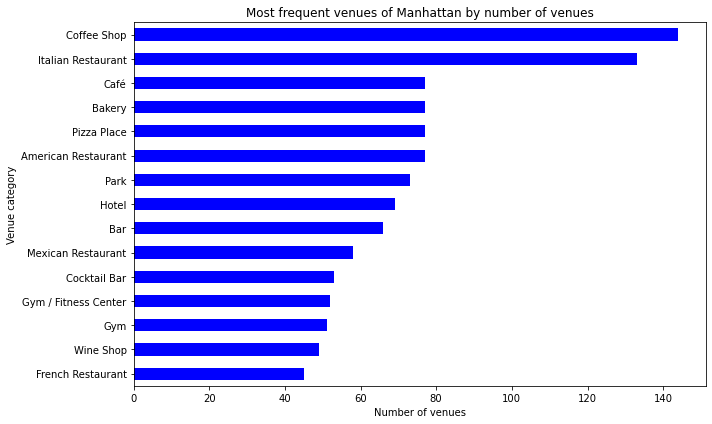

In [53]:
ax = mht_bar1.head(15).plot(kind='barh', color="blue", figsize=(10, 6));
ax.invert_yaxis()
plt.xlabel('Number of venues') # add to x-label to the plot
plt.ylabel('Venue category') # add y-label to the plot
plt.title('Most frequent venues of Manhattan by number of venues') # add title to the plot
plt.tight_layout()

In [54]:
#Getting venues of Toronto

In [55]:
#check bug error - need to repeat for toronto the code below??

In [56]:
#My Forsquare credentials
CLIENT_ID = 'IK1BTQPB2XZBC2YN0NWSCHRMAG3PBIEVPGS0ZRJ5JUXILS2I' # your Foursquare ID
CLIENT_SECRET = '50GTUXMX1ELZ3TDGCCL2CARDAAGFONZAEWGYLSICMOVP4NLB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IK1BTQPB2XZBC2YN0NWSCHRMAG3PBIEVPGS0ZRJ5JUXILS2I
CLIENT_SECRET:50GTUXMX1ELZ3TDGCCL2CARDAAGFONZAEWGYLSICMOVP4NLB


In [57]:
LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [58]:
##bug might exists somewhere near (3-5 cells above, 2-3 cells below), repeat of api credentials required??

In [59]:
toronto_venues = getNearbyVenues(names=toronto_merged['Neighborhood'],
                                   latitudes=toronto_merged['Latitude'],
                                   longitudes=toronto_merged['Longitude']
                                )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

In [60]:
toronto_venues.shape

(1584, 7)

In [61]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [62]:
trt_bar1=toronto_venues["Venue Category"].value_counts()
trt_bar1.head(10) #data for barcharts visualisation performed later in the notebook

Coffee Shop            150
Café                    84
Restaurant              50
Italian Restaurant      41
Hotel                   39
Park                    37
Japanese Restaurant     32
Bakery                  31
Pizza Place             27
Gym                     24
Name: Venue Category, dtype: int64

In [63]:
dftrt=pd.DataFrame(trt_bar1)
dftrt.head(15)

,Venue Category
Coffee Shop,150
Café,84
Restaurant,50
Italian Restaurant,41
Hotel,39
Park,37
Japanese Restaurant,32
Bakery,31
Pizza Place,27
Gym,24


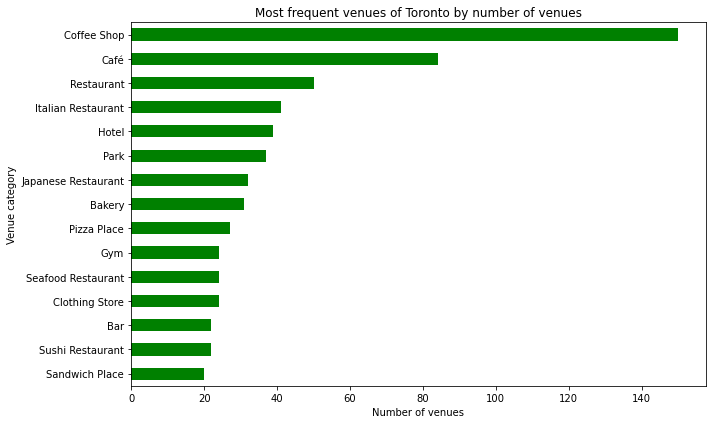

In [64]:
ax = trt_bar1.head(15).plot(kind='barh', color="green", figsize=(10, 6));
ax.invert_yaxis()
plt.xlabel('Number of venues') # add to x-label to the plot
plt.ylabel('Venue category') # add y-label to the plot
plt.title('Most frequent venues of Toronto by number of venues') # add title to the plot
plt.tight_layout()

In [65]:
# one hot encoding Toronto
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_onehot.shape

(1584, 236)

In [66]:
# one hot encoding New york - Manhattan
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

manhattan_onehot.shape

(3239, 328)

In [67]:
toronto_onehot.head()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [68]:
manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South A

In [69]:
#Below code til next graphs extracts how many neighborhoods contains most popular venues venues

In [70]:
mht_g1 = manhattan_onehot.groupby('Neighborhood').max().reset_index()
mht_g1.head(5)

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South A

In [71]:
mht_g1.shape

(40, 328)

In [72]:
mht_g1["Coffee Shop"].sum() # in how many neighborhoods coffee shops exists for example

39

In [135]:
mht_bar2=mht_g1.drop('Neighborhood', axis=1).sum().sort_values(ascending=False)
mht_bar2.head(10)

Coffee Shop            39
Italian Restaurant     33
Pizza Place            33
Bakery                 32
Café                   32
American Restaurant    30
Bar                    28
Park                   28
Gym                    27
Mexican Restaurant     27
dtype: int64

In [138]:
#pd.DataFrame(mht_bar2, columns=["Number of neighbourhoods"]).head(15) #For Manhattan

In [139]:
pd.DataFrame(mht_bar2, columns=["Number of neighbourhoods"]).head(15) #For Manhattan

,Number of neighbourhoods
Coffee Shop,39
Italian Restaurant,33
Pizza Place,33
Bakery,32
Café,32
American Restaurant,30
Bar,28
Park,28
Gym,27
Mexican Restaurant,27


In [134]:
#Graph represents how many neiberhoods contains certain most popular venues

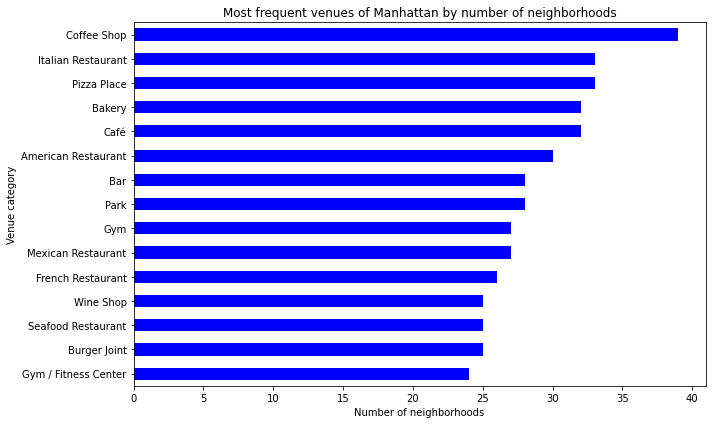

In [76]:
ax = mht_bar2.head(15).plot(kind='barh', color="blue", figsize=(10, 6));
ax.invert_yaxis()
plt.xlabel('Number of neighborhoods') # add to x-label to the plot
plt.ylabel('Venue category') # add y-label to the plot
plt.title('Most frequent venues of Manhattan by number of neighborhoods') # add title to the plot
plt.tight_layout()

In [77]:
#repeat for Toronto

In [78]:
trt_g1 = toronto_onehot.groupby('Neighborhood').max().reset_index()
trt_g1.head(10)

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,"Brockton, Parkdale Village, Exhibition Place",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,

In [79]:
trt_g1["Coffee Shop"].sum() # in how many neighborhoods coffee shops exists

26

In [80]:
trt_bar2=trt_g1.drop('Neighborhood', axis=1).sum().sort_values(ascending=False)

In [81]:
trt_bar2.head(10)

Park                   27
Coffee Shop            26
Café                   26
Restaurant             25
Italian Restaurant     22
Bakery                 19
Pizza Place            18
Bar                    15
Japanese Restaurant    15
Pub                    14
dtype: int64

In [137]:
pd.DataFrame(trt_bar2, columns=["Number of neighbourhoods"]).head(15) #For Toronto

,Number of neighbourhoods
Park,27
Coffee Shop,26
Café,26
Restaurant,25
Italian Restaurant,22
Bakery,19
Pizza Place,18
Bar,15
Japanese Restaurant,15
Pub,14


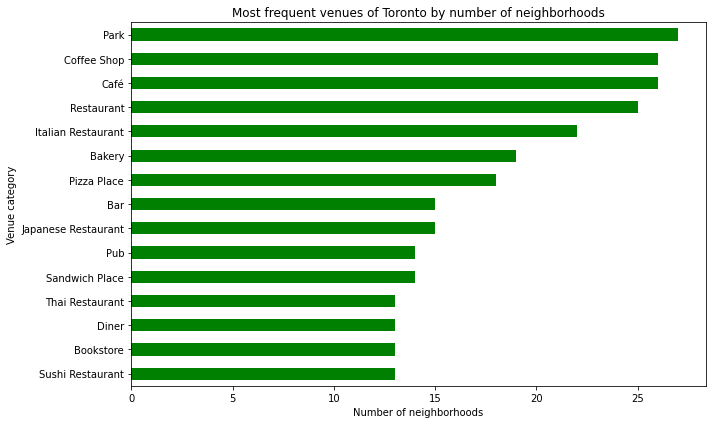

In [83]:
ax = trt_bar2.head(15).plot(kind='barh', color="green", figsize=(10, 6));
ax.invert_yaxis()
plt.xlabel('Number of neighborhoods') # add to x-label to the plot
plt.ylabel('Venue category') # add y-label to the plot
plt.title('Most frequent venues of Toronto by number of neighborhoods') # add title to the plot
plt.tight_layout()

## Most common venues in the cities

In [84]:
#Function as in previous LABS extracts most common venues to a dataframe

In [85]:
#It is used both for NY-Manhattan and Toronto

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [87]:
#Top 10 for NY
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_manhattan = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_manhattan['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted_manhattan.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_manhattan.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Clothing Store,Gym,Playground,Memorial Site,Food Court,Shopping Mall,Sandwich Place
1,Carnegie Hill,Coffee Shop,Café,Wine Shop,Pizza Place,Gym,French Restaurant,Yoga Studio,Bookstore,Bar,Cocktail Bar
2,Central Harlem,Seafood Restaurant,Public Art,African Restaurant,American Restaurant,French Restaurant,Bar,Gym / Fitness Center,Chinese Restaurant,Music Venue,Spa
3,Chelsea,Coffee Shop,Bakery,Art Gallery,American Restaurant,French Restaurant,Wine Shop,Hotel,Ice Cream Shop,Seafood Restaurant,Thai Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Spa,Optical Shop,Dessert Shop,Ice Cream Shop,Hotpot Restaurant


In [88]:
#Top 10 for Toronto
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_toronto = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_toronto['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted_toronto.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_toronto.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Beer Bar,Seafood Restaurant,Pharmacy,Cheese Shop,Restaurant,Bistro
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Gym,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue,Bakery
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Sculpture Garden,Rental Car Location,Plane,Boat or Ferry,Harbor / Marina,Bar,Airport Food Court
3,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Pizza Place,Salad Place,Thai Restaurant,Bubble Tea Shop,Burger Joint
4,Christie,Grocery Store,Café,Park,Nightclub,Italian Restaurant,Restaurant,Baby Store,Candy Store,Athletics & Sports,Coffee Shop


## Building clusters of neighbourhoods

In [89]:
#The choice was made to select 5 clusters for the purpose of this task

In [90]:
#Clusters NY
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_manhattan = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_manhattan.labels_[0:100] 

array([1, 0, 0, 0, 0, 1, 1, 3, 0, 1, 0, 0, 0, 3, 1, 3, 0, 0, 0, 3, 3, 0,
       4, 1, 1, 3, 1, 0, 3, 0, 2, 0, 0, 3, 0, 1, 0, 3, 0, 0], dtype=int32)

In [91]:
#Clusters Toronto
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
#print(toronto_grouped_clustering)
# run k-means clustering
kmeans_toronto = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#len(kmeans.labels_)
#neighborhoods_venues_sorted.shape
#print(kmeans.labels_)
#toronto_grouped_clustering

kmeans_toronto.labels_[0:100]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1,
       3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 0, 4, 3, 3, 3], dtype=int32)

In [92]:
kmeans_toronto.labels_.shape

(39,)

In [93]:
kmeans_manhattan.labels_.shape

(40,)

In [94]:
#Frome here due to earlier rebugging and name commonality index "2" is added to the name

In [143]:
manhattan_merged2 = manhattan_data

# add clustering labels 
manhattan_merged2['Cluster Labels'] = kmeans_manhattan.labels_

# merge dataframes to get most common venues for each neighborhood
manhattan_merged2 = manhattan_merged2.join(neighborhoods_venues_sorted_manhattan.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged2.head(8)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Gym,Sandwich Place,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Spa,Optical Shop,Dessert Shop,Ice Cream Shop,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Mobile Phone Shop,New American Restaurant,Supplement Shop,Latin American Restaurant,Gym,Deli / Bodega,Coffee Shop
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Restaurant,Lounge,Café,Caribbean Restaurant,Bakery,Wine Bar,Pizza Place,Chinese Restaurant,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Café,Coffee Shop,Deli / Bodega,Park,Mexican Restaurant,Yoga Studio,Cocktail Bar,Latin American Restaurant,Sushi Restaurant
5,Manhattan,Manhattanville,40.816934,-73.957385,1,Coffee Shop,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Bar,Supermarket,Burger Joint,Spanish Restaurant,Bus Station,Café
6,Manhattan,Central Harlem,40.815976,-73.943211,1,Seafood Restaurant,Public Art,African Restaurant,American Restaurant,French Restaurant,Bar,Gym / Fitness Center,Chinese Restaurant,Music Venue,Spa
7,Manhattan,East Harlem,40.792249,-73.944182,3,Bakery,Mexican Restaurant,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Park,Sandwich Place,Historic Site,Restaurant,Gas Station


In [96]:
#another bug or fail?? in case required uncoment for troubleshooting
#toronto = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
#toronto.shape

In [97]:

toronto_merged2 = toronto_merged
toronto_merged2.shape

(39, 5)

In [98]:
toronto_merged2['Cluster Labels'] = kmeans_toronto.labels_[0:39]

In [99]:
toronto_merged2.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,3
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,3
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,3
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,3
9,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106,3


In [100]:
# merge toronto dataframes merge dataframes to get most common venues for each neighborhood 
# and to get same columns as for NY
toronto_merged2 = toronto_merged2.join(neighborhoods_venues_sorted_toronto.set_index('Neighborhood'), on='Neighborhood')

toronto_merged2

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Coffee Shop,Park,Bakery,Restaurant,Pub,Breakfast Spot,Café,Theater,Event Space,Performing Arts Venue
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3,Coffee Shop,Clothing Store,Cosmetics Shop,Hotel,Café,Bubble Tea Shop,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Pizza Place
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,Café,Coffee Shop,Gastropub,Cocktail Bar,Gym,Lingerie Store,Restaurant,Seafood Restaurant,Cheese Shop,Park
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,3,Pub,Trail,Health Food Store,Wine Shop,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Dumpling Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Beer Bar,Seafood Restaurant,Pharmacy,Cheese Shop,Restaurant,Bistro
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,3,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Pizza Place,Salad Place,Thai Restaurant,Bubble Tea Shop,Burger Joint
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3,Grocery Store,Café,Park,Nightclub,Italian Restaurant,Restaurant,Baby Store,Candy Store,Athletics & Sports,Coffee Shop
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,3,Coffee Shop,Café,Restaurant,Gym,Hotel,Deli / Bodega,Clothing Store,Thai Restaurant,Concert Hall,Bookstore
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,3,Pharmacy,Bakery,Supermarket,Bank,Brewery,Grocery Store,Park,Liquor Store,Pet Store,Music Venue
9,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106,3,Park,Convenience Store,Wine Shop,Dessert Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [101]:
#Also left for possible troubleshooting
# merge toronto data again in order to add latitude and longitude for each neighborhood
#toronto_merged2 = toronto_merged2.join(neighborhoods_venues_sorted_toronto.set_index('Neighborhood'), on='Neighborhood')

#toronto_merged2 # check the last columns!

## Adding clusters to the map

In [102]:
#for New york
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged2['Latitude'], manhattan_merged2['Longitude'], manhattan_merged2['Neighborhood'], manhattan_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [103]:
#Using same code below again
#Rechanging location to Toronto - find a way to solve this problem (i.e. specify location etc)
#using geocode to get coordinates of Toronto (similiar as in LAB): back to toronto location
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude_t = location.latitude
longitude_t = location.longitude
print('Coordinates of {} are Latitude{}, Longitude {}.'.format(address, latitude, longitude))

Coordinates of Toronto, Canada are Latitude40.7896239, Longitude -73.9598939.


In [104]:
# create map
map_clusters_toronto = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)
print(kclusters)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged2['Latitude'], toronto_merged2['Longitude'], toronto_merged2['Neighborhood'], toronto_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_toronto)
       
map_clusters_toronto

5


## Analyzing Clusters
After grouping data in clusters it is possible to extreact particular clusters. <br/> This should help to determine venue categories that distinguish each cluster. 

In [105]:
#CLUSTER 1

In [145]:

mht_clust_1=manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 0, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]
mht_clust_1.head(8)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Spa,Optical Shop,Dessert Shop,Ice Cream Shop,Hotpot Restaurant
2,Washington Heights,Café,Bakery,Grocery Store,Mobile Phone Shop,New American Restaurant,Supplement Shop,Latin American Restaurant,Gym,Deli / Bodega,Coffee Shop
3,Inwood,Mexican Restaurant,Restaurant,Lounge,Café,Caribbean Restaurant,Bakery,Wine Bar,Pizza Place,Chinese Restaurant,Park
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Deli / Bodega,Park,Mexican Restaurant,Yoga Studio,Cocktail Bar,Latin American Restaurant,Sushi Restaurant
8,Upper East Side,Italian Restaurant,Exhibit,Coffee Shop,Gym / Fitness Center,American Restaurant,Bakery,Spa,Art Gallery,Cosmetics Shop,Hotel
10,Lenox Hill,Italian Restaurant,Pizza Place,Coffee Shop,Café,Sushi Restaurant,Cocktail Bar,Gym / Fitness Center,Gym,Burger Joint,Steakhouse
11,Roosevelt Island,Park,Coffee Shop,Bubble Tea Shop,Food & Drink Shop,Pizza Place,Soccer Field,Farmers Market,Supermarket,Noodle House,School
12,Upper West Side,Italian Restaurant,Bakery,Mediterranean Restaurant,Wine Bar,Bar,Café,Coffee Shop,Dessert Shop,Pub,Pizza Place


In [107]:
trt_clust_1=toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 0, toronto_merged2.columns[[1] + list(range(5, toronto_merged2.shape[1]))]]
trt_clust_1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,0,Coffee Shop,Hotel,Café,Seafood Restaurant,Salad Place,Japanese Restaurant,Restaurant,Italian Restaurant,Concert Hall,Sporting Goods Shop
19,Central Toronto,0,Home Service,Garden,Music Venue,Wine Shop,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
34,Downtown TorontoStn A PO Boxes25 The Esplanade,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Restaurant,Bakery,Beer Bar,Japanese Restaurant,Italian Restaurant,Hotel,Café


In [108]:
#Cluster 2

In [146]:
mht_clust_2=manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 1, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]
mht_clust_2.head(8)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Gym,Sandwich Place,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Department Store
5,Manhattanville,Coffee Shop,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Bar,Supermarket,Burger Joint,Spanish Restaurant,Bus Station,Café
6,Central Harlem,Seafood Restaurant,Public Art,African Restaurant,American Restaurant,French Restaurant,Bar,Gym / Fitness Center,Chinese Restaurant,Music Venue,Spa
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Deli / Bodega,Wine Shop,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Bagel Shop
14,Clinton,Italian Restaurant,Theater,Gym / Fitness Center,American Restaurant,Sandwich Place,Gym,Coffee Shop,Spa,Wine Shop,Hotel
23,Soho,Clothing Store,Italian Restaurant,Boutique,Mediterranean Restaurant,Bakery,Coffee Shop,Sporting Goods Shop,Women's Store,Art Gallery,Shoe Store
24,West Village,Italian Restaurant,New American Restaurant,Park,American Restaurant,Cocktail Bar,Ice Cream Shop,Wine Bar,Cosmetics Shop,Coffee Shop,Gay Bar
26,Morningside Heights,Coffee Shop,Bookstore,Park,American Restaurant,Burger Joint,Café,Deli / Bodega,Farmers Market,Supermarket,Salad Place


In [110]:
trt_clust_2=toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 1, toronto_merged2.columns[[1] + list(range(5, toronto_merged2.shape[1]))]]
trt_clust_2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,1,Trail,Jewelry Store,Sushi Restaurant,Bus Line,Wine Shop,Diner,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
26,Central Toronto,1,Dessert Shop,Sandwich Place,Gym,Sushi Restaurant,Italian Restaurant,Café,Pizza Place,Coffee Shop,Dance Studio,Brewery


In [111]:
#Cluster 3

In [112]:
mht_clust_3=manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 2, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]
mht_clust_3.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Carnegie Hill,Coffee Shop,Café,Wine Shop,Pizza Place,Gym,French Restaurant,Yoga Studio,Bookstore,Bar,Cocktail Bar


In [113]:
trt_clust_3=toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 2, toronto_merged2.columns[[1] + list(range(5, toronto_merged2.shape[1]))]]
trt_clust_3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Downtown Toronto,2,Café,Bakery,Bookstore,Bar,Japanese Restaurant,Bank,Italian Restaurant,Beer Bar,Beer Store,Comfort Food Restaurant


In [114]:
#Cluster 4

In [147]:
mht_clust_4=manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 3, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]
mht_clust_4.head(8)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Bakery,Mexican Restaurant,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Park,Sandwich Place,Historic Site,Restaurant,Gas Station
13,Lincoln Square,Plaza,Concert Hall,Theater,Performing Arts Venue,Café,Indie Movie Theater,Coffee Shop,Wine Shop,French Restaurant,Bakery
15,Midtown,Hotel,Theater,Coffee Shop,Sporting Goods Shop,Clothing Store,Bookstore,American Restaurant,Steakhouse,Spa,Bakery
19,East Village,Bar,Speakeasy,Cocktail Bar,Pizza Place,Mexican Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Korean Restaurant,Italian Restaurant,Ice Cream Shop
20,Lower East Side,Chinese Restaurant,Park,Bakery,Coffee Shop,Ramen Restaurant,Café,Pizza Place,Art Gallery,Flower Shop,Caribbean Restaurant
25,Manhattan Valley,Coffee Shop,Bar,Mexican Restaurant,Playground,Pizza Place,Vietnamese Restaurant,Grocery Store,Hawaiian Restaurant,Hill,Hostel
28,Battery Park City,Park,Hotel,Coffee Shop,Clothing Store,Gym,Playground,Memorial Site,Food Court,Shopping Mall,Sandwich Place
33,Midtown South,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Cosmetics Shop,Gym / Fitness Center,Dessert Shop,Coffee Shop,American Restaurant,Scenic Lookout


In [150]:
trt_clust_4=toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 3, toronto_merged2.columns[[1] + list(range(6, toronto_merged2.shape[1]))]]
trt_clust_4

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Coffee Shop,Park,Bakery,Restaurant,Pub,Breakfast Spot,Café,Theater,Event Space,Performing Arts Venue
1,Downtown Toronto,Coffee Shop,Clothing Store,Cosmetics Shop,Hotel,Café,Bubble Tea Shop,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Pizza Place
2,Downtown Toronto,Café,Coffee Shop,Gastropub,Cocktail Bar,Gym,Lingerie Store,Restaurant,Seafood Restaurant,Cheese Shop,Park
3,East Toronto,Pub,Trail,Health Food Store,Wine Shop,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Dumpling Restaurant
4,Downtown Toronto,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Beer Bar,Seafood Restaurant,Pharmacy,Cheese Shop,Restaurant,Bistro
5,Downtown Toronto,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Pizza Place,Salad Place,Thai Restaurant,Bubble Tea Shop,Burger Joint
6,Downtown Toronto,Grocery Store,Café,Park,Nightclub,Italian Restaurant,Restaurant,Baby Store,Candy Store,Athletics & Sports,Coffee Shop
7,Downtown Toronto,Coffee Shop,Café,Restaurant,Gym,Hotel,Deli / Bodega,Clothing Store,Thai Restaurant,Concert Hall,Bookstore
8,West Toronto,Pharmacy,Bakery,Supermarket,Bank,Brewery,Grocery Store,Park,Liquor Store,Pet Store,Music Venue
9,East YorkEast Toronto,Park,Convenience Store,Wine Shop,Dessert Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [117]:
#Cluster 5

In [118]:
mht_clust_5=manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 4, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]
mht_clust_5.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Little Italy,Bakery,Italian Restaurant,Café,Ice Cream Shop,Hotel,Salon / Barbershop,Thai Restaurant,Chinese Restaurant,Mediterranean Restaurant,Sandwich Place


In [151]:
trt_clust_5=toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 4, toronto_merged2.columns[[1] + list(range(6, toronto_merged2.shape[1]))]]
trt_clust_5

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Downtown Toronto,Coffee Shop,Café,Chinese Restaurant,Italian Restaurant,Pub,Pizza Place,Pharmacy,Bakery,Restaurant,American Restaurant


### Conclusion
Extracted data can be a beginning of decision making proces for stakeholders. Having the data in the form of tables, graph and finaly visualising them on the map will be contributing factor for drawing conclusions.
Now we have some overview of both Toronto and New York.
Looking at the data and maps one can easily identify the area of interest for him or her. This can help in making decision whatever it might be (for.ex. moving, travel as turist, opening new office, finding a point of interest).

Main drawbacks of this analysis is only one source of data for clustering (from the Foursquare API). Possibly more data about both cities could lead to different outcome.
It would be also helpful to add another criteria to analysis (more categories, rating of venues etc). 

The results shows that one can find similarity for both cities but differences also exist. For example both New York and Toronto have plenty of coffee shops, restaurants and cafee s for certain locations of the cities. The analysis might help in finding best location to live, to stay, or to visit.